### Ej 1

In [4]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np
import scipy as sp

#### 1.1: Corpus

Comenzamos exportando los datos del archivo .tgz

In [1]:
import tarfile

In [2]:
tar = tarfile.open('ap.tgz')

In [3]:
tar.extractall()

Sobre el archivo .txt que contiene los datos de AP en xml aplicamos un parser manual para separar los documentos

In [2]:
docno = []
corpus = []
toggle = 0
with open('ap/ap.txt','r') as f:
    for line in f:
        if line.startswith('<DOCNO>'):
            line_new = line.replace('<DOCNO> ','')
            line_new = line_new.replace(' </DOCNO>\n','')
            docno.append(line_new)
        if toggle:
            corpus.append(line)
            toggle = 0
        if line.startswith('<TEXT>'):
            toggle = 1        
docs = dict(zip(docno, corpus))        

Otra forma sería usar el parser del ElementTree, pero para usarlo correctamente resulta necesario reemplazar todos los caracteres '&' por '&amp;' y agregar un tag que delimite el comienzo y final del archivo

In [3]:
with open('ap/ap.txt','r') as f, open('ap/ap_cleaned.txt','w') as f_new:
    f_new.write('<ROOT>\n')
    for line in f:
        new_line = line.replace('&','&amp;')
        f_new.write(new_line)
    f_new.write('</ROOT>\n')
f_new.close()

Ahora aplicamos el ElementTree

In [4]:
import xml.etree.ElementTree as ET

In [5]:
ap = ET.parse('ap/ap_cleaned.txt')
ap

In [6]:
ap_root = ap.getroot()

In [7]:
ap_dict = dict([
        (doc[0].text.strip(), doc[1].text)
        for doc in ap_root
    ])

Y observamos que de las 2 maneras separamos el xml en la misma cantidad de documentos

In [8]:
len(ap_dict)

2250

In [9]:
len(docs)

2250

#### 1.2: Tamaño vocabulario

In [11]:
import nltk

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Tokenizamos y pasamos a minúscula todos los textos.

In [22]:
def tokenize(string):
    'Returns list of tokens'
    # TODO: Cambiar split por: https://stackoverflow.com/questions/15547409/how-to-get-rid-of-punctuation-using-nltk-tokenizer
    words = string.split(' ')  # [Palabra]
    wnl = nltk.WordNetLemmatizer() 
    lemma_words = [wnl.lemmatize(word) for word in words]  # [Palabra]
    retoken = [w.lower() 
               for lw in lemma_words
               for w in nltk.word_tokenize(lw) ]
    return retoken

In [23]:
textos_tokenizados = [
    token
    for text in ap_dict.values()
    for token in tokenize(text)
]

In [27]:
print('Tamaño vocabulario: {}'.format(len(set(textos_tokenizados))))

Tamaño vocabulario: 41824


In [28]:
tokens_ordenados = sorted(textos_tokenizados)

In [18]:
from collections import Counter, OrderedDict

In [30]:
c = Counter(tokens_ordenados)

In [53]:
c.most_common(500)

[('the', 59843),
 (',', 51220),
 ('.', 49818),
 ('a', 25554),
 ('of', 25536),
 ('to', 24054),
 ('and', 20698),
 ('in', 20664),
 ('said', 12852),
 ('``', 11261),
 ("''", 11089),
 ("'s", 9091),
 ('that', 8858),
 ('for', 8824),
 ('wa', 7360),
 ('it', 7144),
 ('on', 7076),
 ('he', 6594),
 ('is', 5957),
 ('with', 5424),
 ('at', 5154),
 ('by', 5126),
 ('from', 4543),
 ('be', 3858),
 ('his', 3734),
 ('an', 3670),
 ('have', 3647),
 ('were', 3584),
 ('but', 3450),
 ('$', 3441),
 ('not', 3399),
 ('ha', 3292),
 ('are', 3250),
 ('they', 2978),
 ('who', 2813),
 ('had', 2635),
 ('would', 2634),
 ('will', 2620),
 ('i', 2492),
 ('we', 2455),
 ('year', 2374),
 ('about', 2360),
 ('this', 2185),
 ('been', 2182),
 ('their', 2068),
 ('new', 2009),
 ('percent', 1942),
 ('which', 1936),
 ('or', 1929),
 ('after', 1920),
 ('one', 1769),
 ('more', 1766),
 ('people', 1732),
 ('up', 1665),
 ('also', 1620),
 ('other', 1618),
 ('million', 1617),
 ("n't", 1599),
 ('when', 1583),
 ('two', 1568),
 ('president', 1553),

Y eliminamos los signos de puntuación

In [67]:
import string
textos_tokenizados_unpunct = []
for texto in textos_tokenizados:
    translator = texto.maketrans('','',string.punctuation)
    if texto.translate(translator) !='':
        textos_tokenizados_unpunct.append(texto.translate(translator))

In [70]:
print('Tamaño vocabulario: {}'.format(len(set(textos_tokenizados_unpunct))))

Tamaño vocabulario: 40205


In [73]:
textos_tokenizados_unpunct_ordenados = sorted(textos_tokenizados_unpunct)

In [74]:
tipos = Counter(textos_tokenizados_unpunct_ordenados)

In [75]:
tipos.most_common(500)

[('the', 59877),
 ('a', 25566),
 ('of', 25536),
 ('to', 24060),
 ('and', 20701),
 ('in', 20671),
 ('said', 12856),
 ('s', 9256),
 ('that', 8859),
 ('for', 8825),
 ('wa', 7360),
 ('it', 7147),
 ('on', 7078),
 ('he', 6595),
 ('is', 5958),
 ('with', 5424),
 ('at', 5157),
 ('by', 5126),
 ('from', 4544),
 ('be', 3858),
 ('his', 3735),
 ('an', 3676),
 ('have', 3648),
 ('were', 3584),
 ('but', 3450),
 ('not', 3403),
 ('ha', 3292),
 ('are', 3251),
 ('they', 2980),
 ('who', 2814),
 ('had', 2635),
 ('would', 2635),
 ('will', 2621),
 ('i', 2508),
 ('we', 2459),
 ('year', 2381),
 ('about', 2360),
 ('this', 2185),
 ('been', 2182),
 ('their', 2068),
 ('new', 2014),
 ('percent', 1942),
 ('which', 1937),
 ('or', 1930),
 ('after', 1920),
 ('one', 1770),
 ('more', 1767),
 ('people', 1732),
 ('up', 1665),
 ('us', 1638),
 ('also', 1621),
 ('other', 1618),
 ('million', 1617),
 ('nt', 1599),
 ('when', 1584),
 ('two', 1570),
 ('president', 1553),
 ('government', 1538),
 ('there', 1512),
 ('no', 1509),
 ('tha

### Ej 2

Bajamos de [Project Gutenberg](http://www.gutenberg.org/) el libro de Darwin ON THE ORIGIN OF SPECIES 

In [12]:
f_darwin = open('gutenberg/On The Origin Of Species.txt')
corpus_darwin = f_darwin.read()

In [13]:
start = '*** START OF THIS PROJECT GUTENBERG EBOOK ON THE ORIGIN OF SPECIES ***'
end = '*** END OF THIS PROJECT GUTENBERG EBOOK ON THE ORIGIN OF SPECIES ***'
corpus_darwin = corpus_darwin[corpus_darwin.find(start)+len(start):corpus_darwin.find(end)]

In [14]:
lines_darwin = corpus_darwin.lower().splitlines()

In [15]:
words_darwin = nltk.wordpunct_tokenize(' '.join(lines_darwin))

In [19]:
c_darwin = Counter(words_darwin)

In [20]:
c_darwin.most_common(100)

[(',', 12321),
 ('the', 10288),
 ('of', 7851),
 ('.', 5180),
 ('and', 4439),
 ('in', 4016),
 ('to', 3605),
 ('a', 2471),
 ('that', 2083),
 ('have', 1762),
 ('be', 1656),
 (';', 1653),
 ('as', 1591),
 ('on', 1553),
 ('species', 1542),
 ('is', 1418),
 ('by', 1357),
 ('which', 1229),
 ('or', 1190),
 ('we', 1157),
 ('are', 1135),
 ('from', 1132),
 ('for', 1123),
 ('it', 1054),
 ('with', 999),
 ('i', 998),
 ('-', 997),
 ('this', 961),
 ('been', 931),
 ('not', 870),
 ('but', 862),
 ('same', 792),
 ('other', 753),
 ('will', 736),
 ('their', 713),
 ('at', 689),
 ('some', 658),
 ('one', 644),
 ('has', 611),
 ('more', 579),
 ('all', 557),
 ('each', 549),
 ('they', 541),
 ('so', 531),
 ('can', 517),
 ('any', 514),
 ('may', 509),
 ('an', 506),
 ('these', 496),
 ('would', 489),
 ('many', 451),
 ('varieties', 434),
 ('when', 419),
 ('if', 415),
 ('selection', 414),
 ('its', 410),
 ('most', 404),
 ('forms', 403),
 ('very', 402),
 ('natural', 382),
 ('than', 373),
 (':', 373),
 ('two', 346),
 ('betwee

In [21]:
import string
words_darwin_unpunct = []
for word_darwin in words_darwin:
    translator = word_darwin.maketrans('','',string.punctuation)
    if word_darwin.translate(translator) !='':
        words_darwin_unpunct.append(word_darwin.translate(translator))

In [22]:
words_darwin_unpunct

['produced',
 'by',
 'sue',
 'asscher',
 'on',
 'the',
 'origin',
 'of',
 'species',
 'or',
 'the',
 'preservation',
 'of',
 'favoured',
 'races',
 'in',
 'the',
 'struggle',
 'for',
 'life',
 'by',
 'charles',
 'darwin',
 'm',
 'a',
 'fellow',
 'of',
 'the',
 'royal',
 'geological',
 'linnaean',
 'etc',
 'societies',
 'author',
 'of',
 'journal',
 'of',
 'researches',
 'during',
 'h',
 'm',
 's',
 'beagle',
 's',
 'voyage',
 'round',
 'the',
 'world',
 'london',
 'john',
 'murray',
 'albemarle',
 'street',
 '1859',
 'down',
 'bromley',
 'kent',
 'october',
 '1st',
 '1859',
 'but',
 'with',
 'regard',
 'to',
 'the',
 'material',
 'world',
 'we',
 'can',
 'at',
 'least',
 'go',
 'so',
 'far',
 'as',
 'this',
 'we',
 'can',
 'perceive',
 'that',
 'events',
 'are',
 'brought',
 'about',
 'not',
 'by',
 'insulated',
 'interpositions',
 'of',
 'divine',
 'power',
 'exerted',
 'in',
 'each',
 'particular',
 'case',
 'but',
 'by',
 'the',
 'establishment',
 'of',
 'general',
 'laws',
 'w',
 '

In [23]:
c_darwin_unpunct = Counter(words_darwin_unpunct)

In [24]:
c_darwin_unpunct.most_common(100)

[('the', 10288),
 ('of', 7851),
 ('and', 4439),
 ('in', 4016),
 ('to', 3605),
 ('a', 2471),
 ('that', 2083),
 ('have', 1762),
 ('be', 1656),
 ('as', 1591),
 ('on', 1553),
 ('species', 1542),
 ('is', 1418),
 ('by', 1357),
 ('which', 1229),
 ('or', 1190),
 ('we', 1157),
 ('are', 1135),
 ('from', 1132),
 ('for', 1123),
 ('it', 1054),
 ('with', 999),
 ('i', 998),
 ('this', 961),
 ('been', 931),
 ('not', 870),
 ('but', 862),
 ('same', 792),
 ('other', 753),
 ('will', 736),
 ('their', 713),
 ('at', 689),
 ('some', 658),
 ('one', 644),
 ('has', 611),
 ('more', 579),
 ('all', 557),
 ('each', 549),
 ('they', 541),
 ('so', 531),
 ('can', 517),
 ('any', 514),
 ('may', 509),
 ('an', 506),
 ('these', 496),
 ('would', 489),
 ('many', 451),
 ('varieties', 434),
 ('when', 419),
 ('if', 415),
 ('selection', 414),
 ('its', 410),
 ('most', 404),
 ('forms', 403),
 ('very', 402),
 ('natural', 382),
 ('than', 373),
 ('two', 346),
 ('between', 339),
 ('plants', 335),
 ('no', 323),
 ('life', 306),
 ('several'

In [25]:
print('Tamaño vocabulario: {}'.format(len(set(words_darwin_unpunct))))

Tamaño vocabulario: 7253


In [26]:
test_word = 'plants'

In [27]:
c_darwin_unpunct[test_word]

335

In [28]:
from itertools import count
word_darwin_index = [i for i, j in zip(count(), words_darwin_unpunct) if j == test_word]

In [29]:
len(word_darwin_index)

335

In [30]:
N = len(words_darwin_unpunct)

In [31]:
word_darwin_delta = [0] * len(words_darwin_unpunct)

In [32]:
len(word_darwin_delta)

156885

Calculamos la densidad de ocurrencias de la palabra *w*.
\begin{equation*}
v_{w} (t) = \sum_{j=1}^n \delta(t-t_{j})
\end{equation*}

In [33]:
for index in word_darwin_index:
    word_darwin_delta[index] = 1

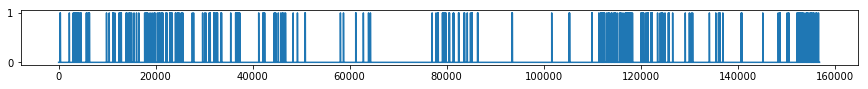

In [34]:
plt.figure(figsize(15, 1))
plot(word_darwin_delta)
plt.show()

Obtenemos la tasa de ocurrencias de convolucionar la densidad de ocurrencias con un kernel gaussiano.
\begin{equation*}
\rho_{w} (t) = \int_{-\infty}^\infty G(t-t'_{w},\sigma) v_{w}(t')dt'
\end{equation*}

In [35]:
from scipy import ndimage

In [38]:
word_darwin_gaussian = ndimage.filters.gaussian_filter(word_darwin_delta, 50)

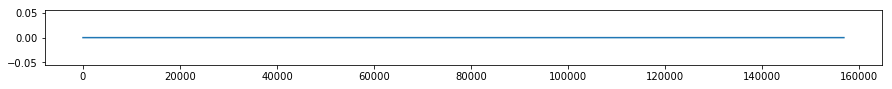

In [39]:
plt.figure(figsize(15, 1))
plot(word_darwin_gaussian)
plt.show()

In [46]:
from astropy.convolution import convolve, Gaussian1DKernel

In [47]:
gauss_kernel = Gaussian1DKernel(50)
# smoothed_data_gauss[i] = p_w(i)
smoothed_data_gauss = convolve(word_darwin_delta, gauss_kernel)

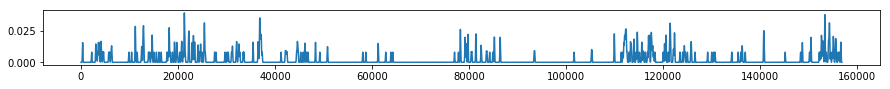

In [48]:
plt.figure(figsize(15, 1))
plot(smoothed_data_gauss)
plt.show()

In [49]:
self_corr = np.correlate(smoothed_data_gauss, smoothed_data_gauss,'full')

In [52]:
paper_corr = ((self_corr / smoothed_data_gauss.shape[0]) - smoothed_data_gauss.mean() ** 2) / smoothed_data_gauss.var()

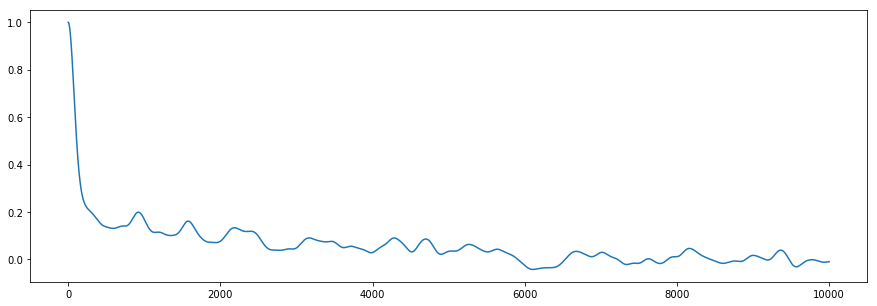

In [54]:
plt.figure(figsize(15, 5))
plot(paper_corr[len(smoothed_data_gauss)-1:len(smoothed_data_gauss)+10000])
plt.show()

    TODO: esta forma no esta bien. ademas de no estar normalizada, no me da lo mismo que el paper. revisar si lo que hicieron es lo mismo u otra cosa.

Armo la función que calcula el rate of occurrence y la pruebo en la palabra 'instinct' que es la 2da que usa en el paper.

In [182]:
def rate_of_occurrence(words_list, test_word, sigma=50):
    from itertools import count
    word_index = [i for i, j in zip(count(), words_list) if j == test_word]
    word_delta = [0] * len(words_list)
    for index in word_index:
        word_delta[index] = 1
    from astropy.convolution import convolve, Gaussian1DKernel
    gauss_kernel = Gaussian1DKernel(sigma)
    word_gauss = convolve(word_delta, gauss_kernel)
    return word_gauss

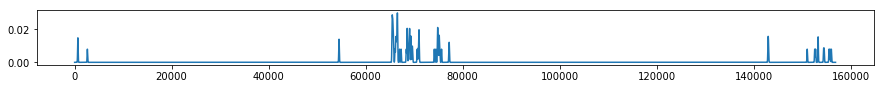

In [183]:
plt.figure(figsize(15, 1))
plot(rate_of_occurrence(words_darwin_unpunct, 'instinct'))
plt.show()

Armo la función para calcular la autocorrelación y la pruebo en la palabra 'instinct' que es la 2da que usa en el paper.

    TODO: recordar que hay que cambiar la parte de la correlacion cruzada con el np, que es la que da mal.

In [180]:
def self_correlation(words_list, test_word, sigma=50):
    from itertools import count
    word_index = [i for i, j in zip(count(), words_list) if j == test_word]
    word_delta = [0] * len(words_list)
    for index in word_index:
        word_delta[index] = 1
    from astropy.convolution import convolve, Gaussian1DKernel
    gauss_kernel = Gaussian1DKernel(sigma)
    word_gauss = convolve(word_delta, gauss_kernel)
    import numpy as np
    self_corr = np.correlate(smoothed_data_gauss, smoothed_data_gauss,'full')
    self_corr = self_corr[len(smoothed_data_gauss)-1:-1]
    return self_corr

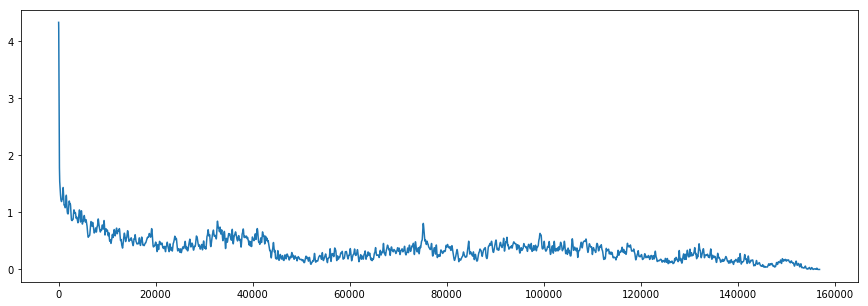

In [181]:
plt.figure(figsize(15, 5))
plot(self_correlation(words_darwin_unpunct, 'instinct'))
plt.show()

Ahora la parte de entropía. Para eso, separamos el texto en segmentos de aproximadamente la misma cantidad de palabras y calculamos el número de ocurrencias de una palabra ('plants') en cada una de los segmentos. Ese valor dividido el número total de ocurrencias de la palabra va a dar la probabilidad de que esa palabra aparezca en ese segmento.

In [153]:
parts= 10
[len(segment) for segment in np.array_split(word_darwin_delta, parts)]

[15689, 15689, 15689, 15689, 15689, 15688, 15688, 15688, 15688, 15688]

In [161]:
parts= 10
nj = [sum(segment) for segment in np.array_split(word_darwin_delta, parts)]

In [154]:
sum(nj)

335

In [162]:
parts= 10
pj = [sum(segment)/sum(word_darwin_delta) for segment in np.array_split(word_darwin_delta, parts)]

In [163]:
pj

[0.13134328358208955,
 0.17611940298507461,
 0.1253731343283582,
 0.026865671641791045,
 0.026865671641791045,
 0.080597014925373134,
 0.0089552238805970154,
 0.23582089552238805,
 0.053731343283582089,
 0.13432835820895522]

In [164]:
sum(pj)

1.0

Con ese valor de probabilidad calculamos la entropía de la palabra *w* para una partición en *P* segmentos.
\begin{equation*}
H (J|w) = - \sum_{j=1}^P p_{j}\log_{2}[p_{j}]
\end{equation*}

    Creo que tambien se puede usar np.log2

In [175]:
import math
[p*math.log(p,2) for p in pj]

[-0.38465005771685029,
 -0.4412450146955651,
 -0.37558028127697829,
 -0.14018755389589671,
 -0.14018755389589671,
 -0.29281941536091044,
 -0.060922878668274449,
 -0.49150652667544636,
 -0.22664376450821136,
 -0.38903698061401698]

In [176]:
word_entropy = sum([p*math.log(p,2) for p in pj])

In [297]:
def get_word_entropy(words_list, test_word, parts=10):
    from itertools import count
    word_index = [i for i, j in zip(count(), words_list) if j == test_word]
    word_delta = [0] * len(words_list)
    for index in word_index:
        word_delta[index] = 1
    pj = [sum(segment)/sum(word_delta) for segment in np.array_split(word_delta, parts)]
    import math
    word_entropy = -sum([p*math.log(p,2) for p in pj if p!=0]) # correccion para que se pueda calcular el log, si p=0 entonces no suma nada a la entropia
    return word_entropy

In [298]:
get_word_entropy(words_darwin_unpunct, 'plants', parts=64)

5.208546234103272

Y calculamos la entropía para 100 palabras seleccionadas tal que 50 son las más frecuentes y 50 las menos frecuentes.

In [276]:
words_darwin_selected = c_darwin_unpunct.most_common()[0:50] + c_darwin_unpunct.most_common()[-50:]

In [299]:
words_darwin_selected_entropy = [get_word_entropy(words_darwin_unpunct, word_darwin_selected[0]) for word_darwin_selected in words_darwin_selected]

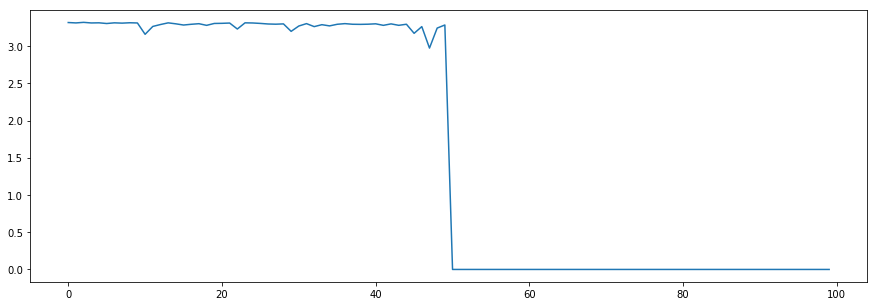

In [300]:
plt.figure(figsize(15,5))
plot(words_darwin_selected_entropy)
plt.show()

    Esta bueno porque se ve claramente la diferencia entre valores de entropía. Habría que ver si sería mejor trabajar sólo con palabras y limpiar de la lista seleccionada los números. También se puede ver de hacer un violinplot separando en grupos de: frecuencias altas, frecuencias bajas.

In [279]:
c_darwin_unpunct.most_common()[-50:]

[('275', 1),
 ('310', 1),
 ('323', 1),
 ('382', 1),
 ('fossilized', 1),
 ('226', 1),
 ('483', 1),
 ('monocanthus', 1),
 ('musical', 1),
 ('209', 1),
 ('453', 1),
 ('337', 1),
 ('186', 1),
 ('319', 1),
 ('435', 1),
 ('pheasant', 1),
 ('335', 1),
 ('reverting', 1),
 ('poisonous', 1),
 ('38', 1),
 ('french', 1),
 ('488', 1),
 ('16', 1),
 ('459', 1),
 ('reciprocity', 1),
 ('273', 1),
 ('sageret', 1),
 ('34', 1),
 ('437', 1),
 ('164', 1),
 ('snap', 1),
 ('54', 1),
 ('246', 1),
 ('263', 1),
 ('265', 1),
 ('196', 1),
 ('228', 1),
 ('446', 1),
 ('274', 1),
 ('75', 1),
 ('423', 1),
 ('355', 1),
 ('58', 1),
 ('367', 1),
 ('157', 1),
 ('hymenopterous', 1),
 ('isles', 1),
 ('52', 1),
 ('project', 1),
 ('gutenberg', 1)]

In [294]:
words_darwin_selected_frequency = [word_darwin_selected[1] for word_darwin_selected in words_darwin_selected]

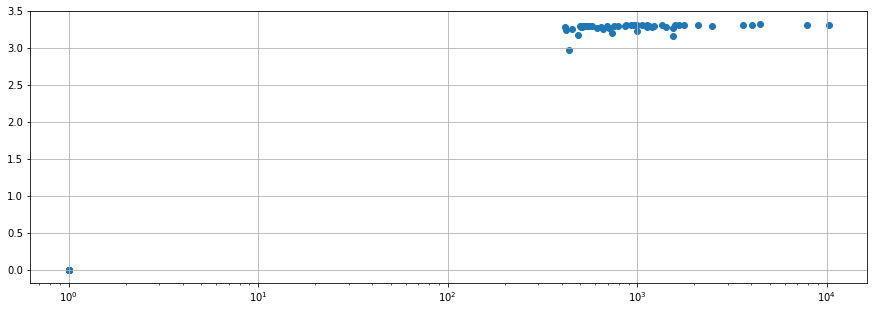

In [305]:
plt.figure(figsize(15,5))
scatter(words_darwin_selected_frequency, words_darwin_selected_entropy)
plt.xscale('log')
plt.grid(True)
plt.show()

    Y lo puedo correr para todas las palabras, pero tarda un rato

In [306]:
words_darwin_all_entropy = [get_word_entropy(words_darwin_unpunct, word_darwin_all[0]) for word_darwin_all in c_darwin_unpunct.most_common()]

In [308]:
words_darwin_all_frequency = [word_darwin_all[1] for word_darwin_all in c_darwin_unpunct.most_common()]

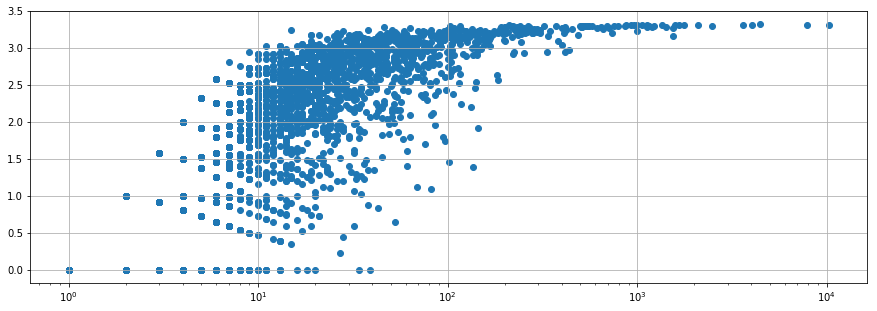

In [309]:
plt.figure(figsize(15,5))
scatter(words_darwin_all_frequency, words_darwin_all_entropy)
plt.xscale('log')
plt.grid(True)
plt.show()

In [3]:
import pickle

In [10]:
with open('gutenberg/words_darwin_all_entropy.pkl', 'wb') as f_save:
    pickle.dump(words_darwin_all_entropy, f_save)

In [11]:
with open('gutenberg/words_darwin_all_frequency.pkl', 'wb') as f_save:
    pickle.dump(words_darwin_all_frequency, f_save)

In [4]:
with open('gutenberg/words_darwin_all_entropy.pkl', 'rb') as f_load:
    words_darwin_all_entropy = pickle.load(f_load)

In [5]:
with open('gutenberg/words_darwin_all_frequency.pkl', 'rb') as f_load:
    words_darwin_all_frequency = pickle.load(f_load)

Por último se puede calcular estas métricas pero randimizando la posición de las palabras en el texto.

In [330]:
words_darwin_unpunct_random = words_darwin_unpunct.copy()
np.random.shuffle(words_darwin_unpunct_random)

In [331]:
words_darwin_unpunct_random

['flight',
 'mountains',
 'will',
 'their',
 'it',
 'and',
 'i',
 'ireland',
 'wax',
 'at',
 'frequently',
 'yielded',
 'destroying',
 'slow',
 'be',
 'differ',
 'known',
 'australia',
 'lately',
 'wary',
 'importance',
 'have',
 '429',
 'and',
 'in',
 'organs',
 'believe',
 'is',
 'period',
 'several',
 'already',
 'cultivate',
 'most',
 'crabs',
 'beds',
 'situated',
 'the',
 'i',
 'away',
 'it',
 'or',
 'hence',
 'each',
 'can',
 'might',
 'grapple',
 'must',
 'on',
 'liable',
 'to',
 'a',
 'law',
 'must',
 'explains',
 'other',
 'incapable',
 'been',
 'in',
 'settled',
 'the',
 'part',
 'improve',
 'and',
 'of',
 'seems',
 'they',
 'compensation',
 'this',
 'amongst',
 'northern',
 'will',
 'the',
 'meet',
 'late',
 'been',
 'race',
 'admitted',
 'transmitted',
 'within',
 'of',
 'each',
 'difference',
 'of',
 'conquer',
 'tract',
 'of',
 'especially',
 'past',
 'which',
 'in',
 'together',
 'sea',
 'that',
 'alternative',
 'greater',
 'in',
 'and',
 'metamorphosed',
 'the',
 'i',
